# *Task_3 Customer churn prediction for bank customers*

<p style="font-size:20px;"><i>In this task, our goal is to predict the churn i.e the probability of a customer to leave, for a bank. We build a supervised machine learning model that can predict whether a customer is likely to leave the bank based on their data. Using the Churn Modelling dataset, we will clean and preprocess the data, analyze the data, perform encoding and scaling wherever needed and train a classification model like the RandomForest model. We will evaluate the model and furthermore analyze the importance of various features to understand which features most influence customer churn.</i></p>

## *Data cleaning and preprocessing*

### *Importing important libraries*

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *Loading the dataset*

In [2]:
# Load the customer churn dataset into pandas dataframe
df = pd.read_csv('Churn_Modelling.csv')

### *Displaying and analyzing the dataframe*

In [3]:
# Display the first five rows of the dataframe to get a quick preview 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Get the number of rows and columns of the dataframe
df.shape

(10000, 14)

In [5]:
# Display concise overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Display overall statistics for numerical features of the dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### *Checking for nulls and duplicates*

In [7]:
# Check for any null values in the dataframe
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Check for any duplicate rows in the dataframe
df.duplicated().sum()

0

## *Feature selection*

In [9]:
# Display the columns of the dataframe
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
# Drop the unnecesssary columns from the dataframe
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [11]:
# Get the dimensions of the dataframe after dropping the columns 
df.shape

(10000, 11)

In [12]:
# Display the initial rows of the dataframe to check the remaining columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## *Exploratory Data Analysis*

### *Univariate analysis*

### *Histograms*

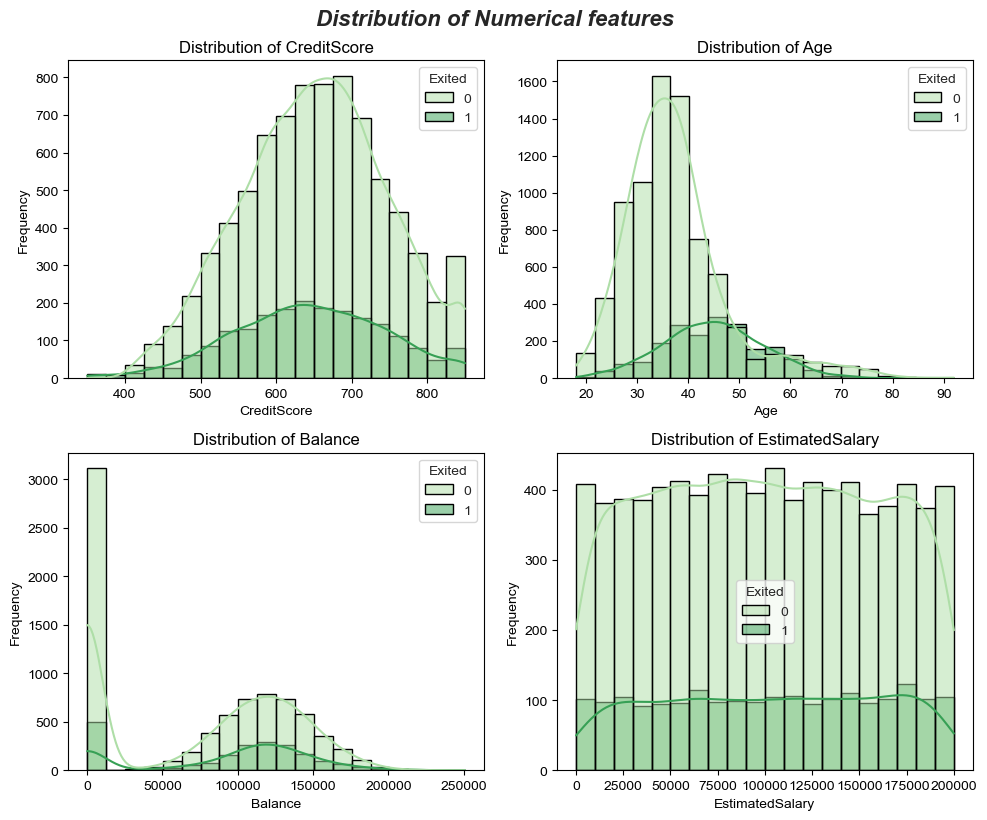

In [13]:
# Separate the numerical features/columns for analysis
numerical_cols = ['CreditScore', 'Age', 'Balance','EstimatedSalary']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
sns.set_style('whitegrid')

# Plot histogram for each feature
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Exited', kde=True, bins=20, ax=axes[i],  edgecolor='black', palette='Greens')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.suptitle("Distribution of Numerical features", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

### *Boxplots*

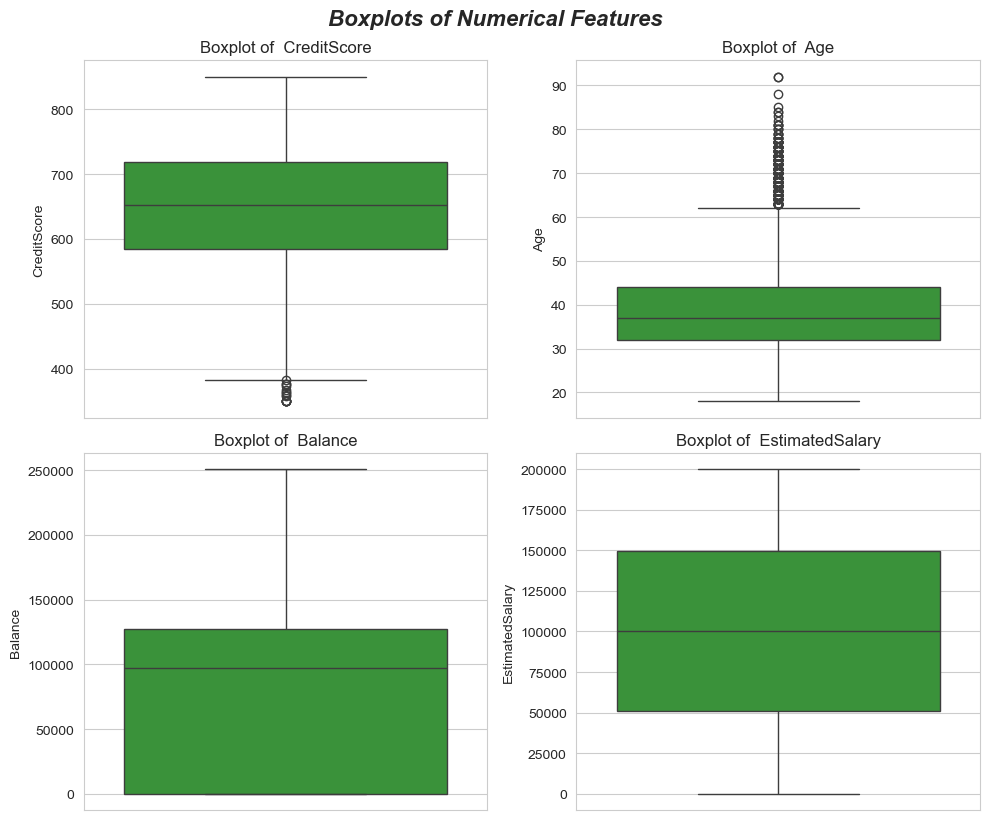

In [14]:
# Separate the numerical columns for analysis
numerical_cols = ['CreditScore', 'Age', 'Balance','EstimatedSalary']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

# Plot box plot for each feature by churn
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='#2ca02c')
    axes[i].set_title(f'Boxplot of  {col}')

# Adjust layout
plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

### *Bivariate analysis*

### *Boxplots for numerical features vs target*

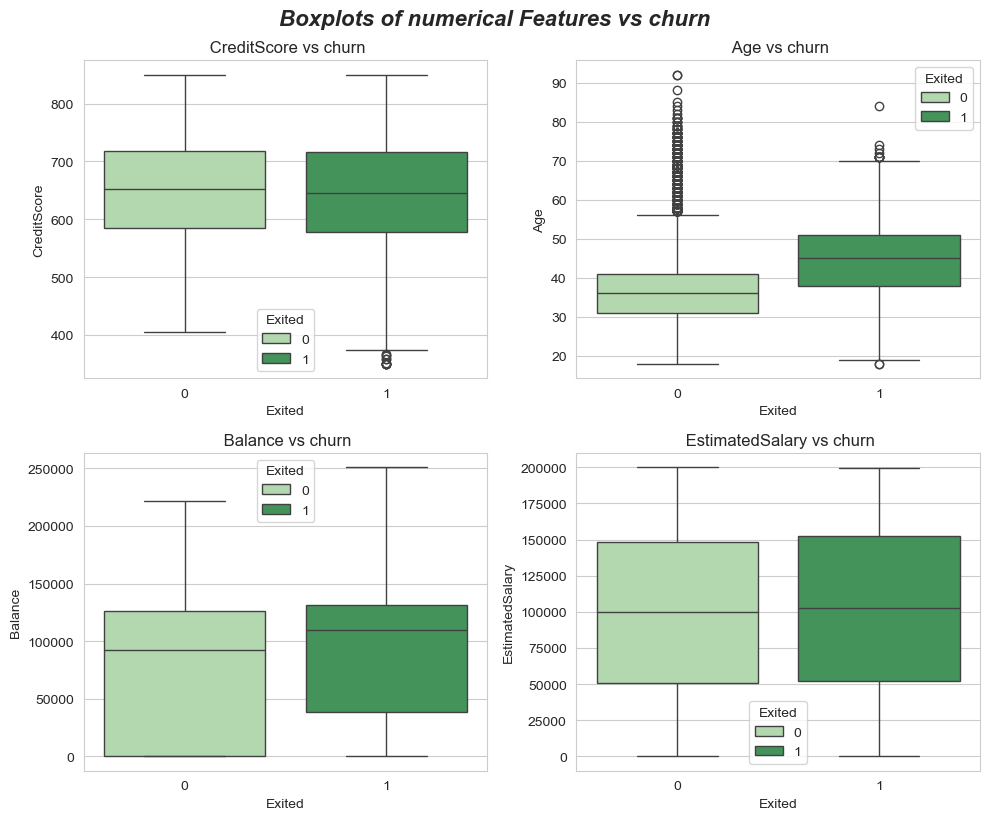

In [15]:
# Bivariate analysis of numerical features vs churn
numerical_cols = ['CreditScore', 'Age', 'Balance','EstimatedSalary']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()

# Plot boxplot for each numerical feature vs churn 
for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Exited', hue='Exited', y=col, ax= axes[i], palette='Greens')
    axes[i].set_title(f' {col} vs churn')

# Adjust layout
plt.tight_layout()
plt.suptitle("Boxplots of numerical Features vs churn", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

### *Countplots for categorical features vs target*

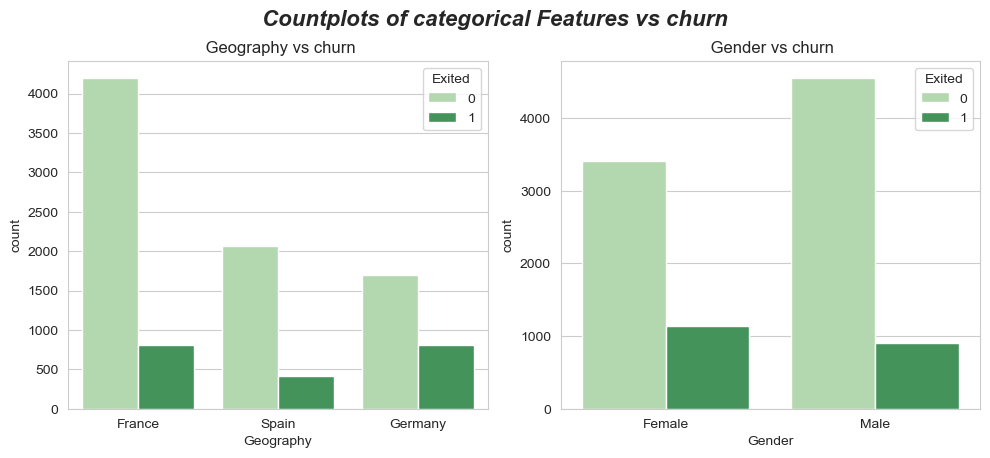

In [16]:
# Bivariate analysis of categorical vs churn

# Separate the categorical columns for analysis
categorical_cols = ['Geography', 'Gender']

# Plot the Count plots using subplots
plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_cols):
    # Subplot for countplot
    plt.subplot(len(categorical_cols), 2, i+1)
    sns.countplot(data=df, x=col, hue='Exited', palette='Greens')
    plt.title(f' {col} vs churn')

# Adjust layout
plt.tight_layout()
plt.suptitle("Countplots of categorical Features vs churn", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()


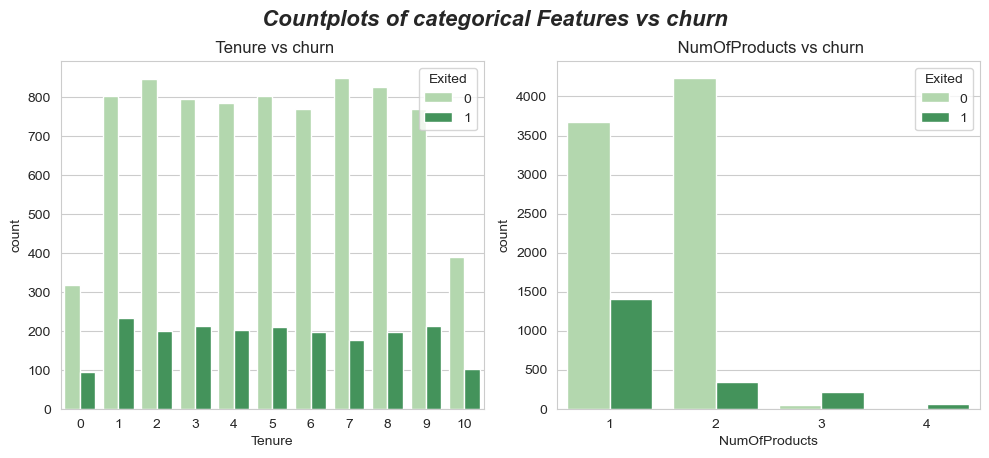

In [17]:
# Bivariate analysis of categorical vs churn

# Separate the categorical columns for analysis
categorical_cols = ['Tenure','NumOfProducts']

# Plot the Count plots using subplots
plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_cols):
    # Subplot for countplot
    plt.subplot(len(categorical_cols), 2, i+1)
    sns.countplot(data=df, x=col, hue='Exited', palette='Greens')
    plt.title(f' {col} vs churn')

# Adjust layout
plt.tight_layout()
plt.suptitle("Countplots of categorical Features vs churn", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

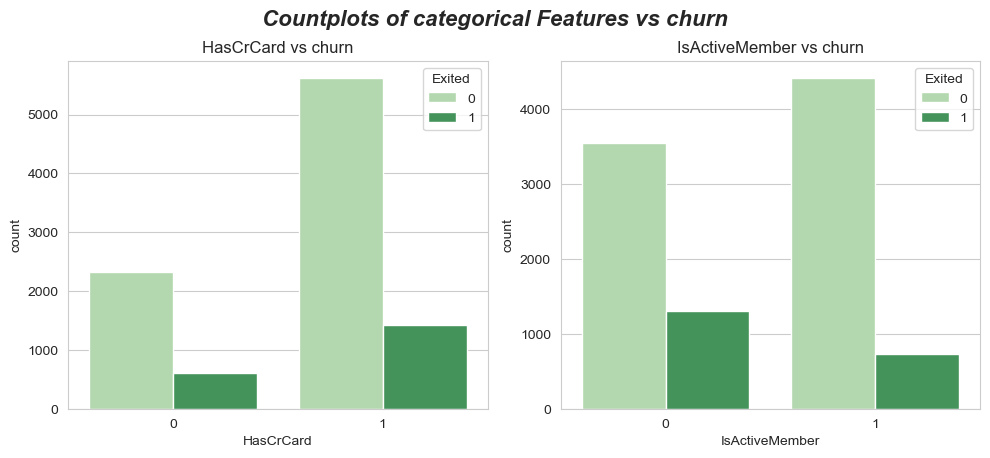

In [18]:
# Bivariate analysis of categorical vs churn

# Separate the categorical columns for analysis
categorical_cols = ['HasCrCard', 'IsActiveMember']

# Plot the Count plots using subplots
plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_cols):
    # Subplot for countplot
    plt.subplot(len(categorical_cols), 2, i+1)
    sns.countplot(data=df, x=col, hue='Exited', palette='Greens')
    plt.title(f'{col} vs churn')

# Adjust layout
plt.tight_layout()
plt.suptitle("Countplots of categorical Features vs churn", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()


### *Target variable ('Exited') analysis*

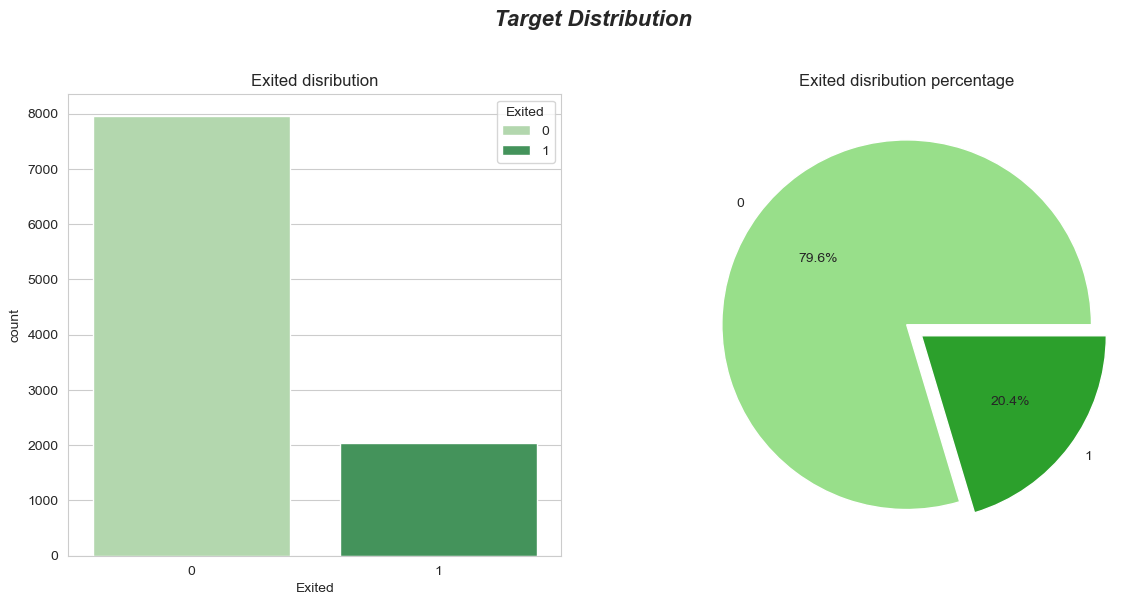

In [15]:
# Plotting a count plot and pie chart for the target 'Exited'
plt.figure(figsize=(14,6))

# First subplot - count plot
plt.subplot(1,2,1)
sns.countplot(data=df, x="Exited", hue='Exited', palette='Greens')
plt.title("Exited disribution")

# Calculate the count of each value in the "Exited" column
count = df["Exited"].value_counts()

# Second subplot - pie chart
plt.subplot(1,2,2)
plt.pie(count.values, labels=['0', '1'], autopct="%1.1f%%",explode=[0, 0.1], colors=['#98df8a', '#2ca02c'])
plt.title("Exited disribution percentage")
plt.suptitle("Target Distribution", y=1.02, fontsize=16,  weight='bold', style='italic')
plt.show()

## *Categorical Feature Encoding*

In [18]:
# Count the number of occurrences of each unique value in the 'Geography' column
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
# Count the number of occurrences of each unique value in the 'Gender' column
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### *One Hot Encoding*

In [20]:
# Import OneHotEncoder from sklearn's preprocessing module for nominal categorical data encoding
from sklearn.preprocessing import OneHotEncoder
# Create an encoder instance
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore',dtype=np.int32)

In [21]:
# Fit and transform the categorical features
df_encoded = one_hot_encoder.fit_transform(df[['Geography','Gender']])

In [22]:
# Convert to a dataframe
df_encoded = pd.DataFrame(df_encoded, columns=one_hot_encoder.get_feature_names_out(['Geography', 'Gender']))
# Concatenate with original dataframe (excluding encoded columns)
df_encoded = pd.concat([df.drop(['Geography', 'Gender'], axis=1), df_encoded], axis=1)

In [23]:
# Display the final dataframe after one hot encoding
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


### *Multivariate analysis*

### *Correlation Bar Chart*

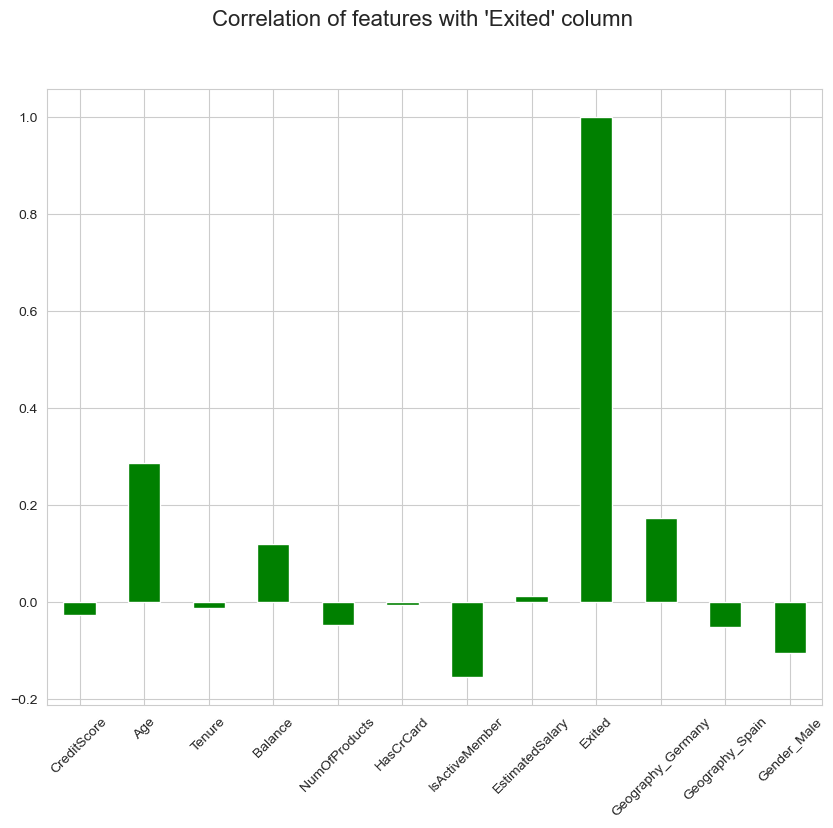

In [24]:
# Multivariate analysis
corr = df_encoded.corrwith(df_encoded['Exited'])
corr.plot.bar(figsize=(10,8), rot=45, grid=True, color='green' )
plt.suptitle("Correlation of features with 'Exited' column", fontsize=16)
plt.show()

### *Correlation Heatmap*

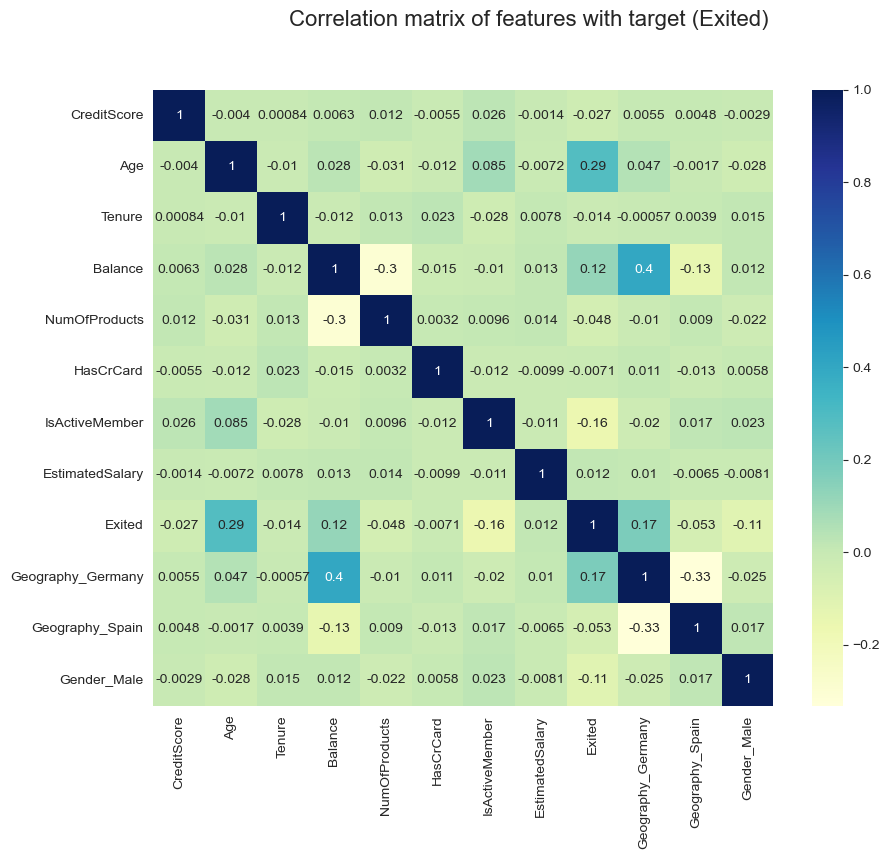

In [27]:
# Compute correlation matrix
corr = df_encoded.corr()
# Plot correlation matrix using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.suptitle('Correlation matrix of features with target (Exited)', fontsize=16)
plt.show()

## *Building a Classification Model*

### *Splitting train and test data*

In [25]:
# Import train_test_split from sklearn's model_Selection module to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

In [26]:
# Separate features (x) and target variable (y)
x = df_encoded.drop(['Exited'], axis=1)
y = df_encoded['Exited']

In [27]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 , stratify=y)

## *Random Forest Model training*

In [28]:
# Import RandomForest from sklearns's ensemble module to build and train a classification model
from sklearn.ensemble import RandomForestClassifier

### *Addressing class imbalance* 

In [29]:
# Import SMOTE (Synthetic Minority Over-sampling Technique) from imbalanced-learn library
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply SMOTE to balance the training dataset
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)


In [30]:
# Build and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

## *Model predictions*

In [31]:
# Make predictions using the model
y_pred = rf_model.predict(x_test)


In [32]:
# Display the predicted vs actual values using a dataframe
performance = pd.DataFrame({'Prediction': y_pred, 'Actual':y_test})
performance.head(100)

,Prediction,Actual
5702,0,0
3667,0,0
1617,0,0
5673,0,0
4272,0,0
...,...,...
958,0,0
1303,0,1
2798,0,0
2415,0,0


## *Model Evaluation*

In [33]:
# Import accuracy_score, confusion_matrix and classification_report from sklearn's metrics module to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### *Classification report*

In [42]:
# Classification report: precision, recall, f1-score, support
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))

Classification Report:

              precision    recall  f1-score   support

   Not Churn       0.90      0.86      0.88      1593
       Churn       0.54      0.65      0.59       407

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000



### *Accuracy score*

In [35]:
# Display the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.82


### *Confusion Matrix*

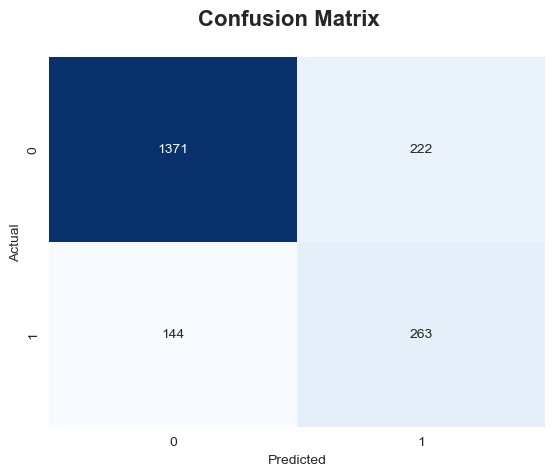

In [36]:
# Display the confusion matrix of the model using heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.suptitle('Confusion Matrix', fontsize=16, fontweight='bold')
plt.show()

## *Features importance*

In [37]:
# Extract the coefficients (feature importances) from the Random Forest model
importances = rf_model.feature_importances_
# Sort the indices in ascending order of importance
indices = np.argsort(importances)[::-1]
# Get the corresponding feature names from x_train_bal
names = [x.columns[i] for i in indices]

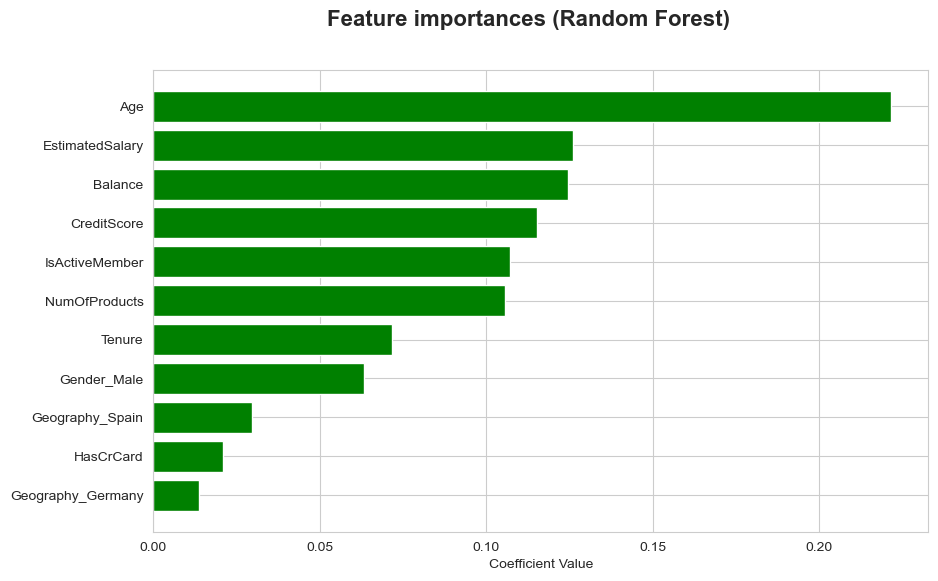

In [38]:
# Create DataFrame and sort
feat_df = pd.DataFrame({'Feature': names, 'Importance': importances[indices]})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
# Create a horizontal bar plot of feature importances
plt.figure(figsize=(10,6))
plt.suptitle("Feature importances (Random Forest)", fontsize=16, fontweight='bold')
plt.barh(range(len(importances)), importances[indices], color='green')
plt.yticks(range(len(importances)), names)
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

In [40]:
# Display the coefficient values of each feature
feat_df

,Feature,Importance
0,Age,0.221715
1,EstimatedSalary,0.126208
2,Balance,0.124626
3,CreditScore,0.115156
4,IsActiveMember,0.107091
5,NumOfProducts,0.105719
6,Tenure,0.071734
7,Gender_Male,0.063250
8,Geography_Spain,0.029752
9,HasCrCard,0.020957


## Conclusion

<p style="font-size:18px;">After thorough data preprocessing and Exploratory Data Analysis, the Churn Modelling dataset was found to be clean, with no missing or duplicate values. However, the target variable 'Exited' was imbalanced, with 80% non-churners and 20% churners. To address this, oversampling was applied. Key insights from the analysis include:</p>
<ul style="font-size:18px;"><li>Age is by far the most important feature influencing the target variable.</li>
<li>Estimated salary, Balance and CreditScore  also significantly influence the churn risk.</li>
<li>IsActiveMember and NumOfProducts have moderate importance.</li>
<li>Features like Tenure, Gender, Geography and HasCrCard have a very low importance.</li></ul>
<p style="font-size:18px;">The trained classification model effectively identifies customers who are at risk of leaving the bank with an accuracy of 82%. The model heavily relies on customer age and financial attributes such as salary, balance, and credit score to predict outcomes. Behavioral and demographic features like gender, geography, and credit card ownership have minimal influence. This suggests that improving customer experience and retention strategies should focus more on financial behavior and lifecycle stage rather than demographic factors alone.</p>
